In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

###**DATA PROCESSING**

---



*Data Download*

In [2]:
from google.colab import drive
!wget '/content/drive/MyDrive/ComputerVisionDeepLearning/retineurali/Images_for_MOBILENET/MRL'
!rm -rf /content/merge/
!mkdir /content/merge
!mkdir /content/merge/open
!mkdir /content/merge/close

#mi creo a livello del content una cartella MRL 
#con due sotto cartelle Open e Close

/content/drive/MyDrive/ComputerVisionDeepLearning/retineurali/Images_for_MOBILENET/MRL: Scheme missing.


In [ ]:
#!unzip /content/drive/MyDrive/ComputerVisionDeepLearning/MergeDataset_closed_eye.zip -d /content/drive/MyDrive/ComputerVisionDeepLearning/MergeDataset_closed_eye
#!unzip /content/drive/MyDrive/ComputerVisionDeepLearning/MergeDataset_opened_eye.zip -d /content/drive/MyDrive/ComputerVisionDeepLearning/MergeDataset_opened_eye

In [3]:
#Librerie utili
import glob
import os
from shutil import copyfile
import cv2
from sklearn.decomposition import PCA #methods PCA

In [4]:
def lin_image(base_image):
    (H,W,channel) = np.shape(base_image)                  #prendo la forma (altezza,larghezza e canali)
    lin_image = base_image.reshape(H*W,channel).squeeze() #linearizzo, togliendo una dimensione
    return lin_image

def unlin_image(in_image,H,W):
    (L,channel) = np.shape(in_image)                      #Prendo la forma e salvo in L
    
    #Vado a verificare le possibili dimensioni dell'immagine
    if L != H*W:
        raise ValueError('The length of the image does not correspond to the Height and width input')
    # Delinearizzo
    base_image = in_image.reshape(H,W,channel).squeeze()  #torna alla forma iniziale 
    return base_image

# Compute the PCA of the image
def PCAImage(image,n_components=1):       #spazio dimensionale
    # Ottengo la dimensione dell'immagine
    (H, W, ch) = np.shape(image)
    #Creo un oggetto PCA dalla libreria scikit-learn
    sklearn_pca = PCA(n_components=n_components)
    #Applico il PCA all'immagine linearizzata
    lin_pca = sklearn_pca.fit_transform(lin_image(image))
    #Trasformo l'immagine linearizzata in immagine normale
    out_pca = unlin_image(lin_pca, H, W)
    #cast dell'immagine di output nel formato uint8 (0-255)
    out_pca = np.uint8((out_pca - np.min(out_pca)) * 255 / (np.max(out_pca) - np.min(out_pca))) #varianza/covarianza(?)
    return out_pca

In [ ]:
#folder_close = '/content/drive/MyDrive/ComputerVisionDeepLearning/retineurali/Images_for_MOBILENET/MRL/MRL_closed_eye'
#folder_MRLclose = '/content/MRL/close'

In [7]:
#Lettura e creazione di immagini in GraySCALE nella cartella appena creata
folder_close = '/content/drive/MyDrive/ComputerVisionDeepLearning/retineurali/Images_for_MOBILENET/MRL/MRL_closed_eye'
folder_MRLclose = '/content/merge/close'
index = 0
for file_name in os.listdir(folder_close):

  if index == 100:
    break
  
  input_image =cv2.imread(folder_close + "/" + file_name)
  input_image =cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB) 
  pca_image = PCAImage(input_image, n_components=1)
  
  os.chdir(folder_MRLclose)
  cv2.imwrite('pca_image' + str(index) + '.png', pca_image)
  print(os.listdir(folder_MRLclose))

  index += 1

['pca_image0.png']
['pca_image0.png', 'pca_image1.png']
['pca_image2.png', 'pca_image0.png', 'pca_image1.png']
['pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image1.png']
['pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image1.png']
['pca_image5.png', 'pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image1.png']
['pca_image5.png', 'pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image6.png', 'pca_image1.png']
['pca_image7.png', 'pca_image5.png', 'pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image6.png', 'pca_image1.png']
['pca_image7.png', 'pca_image8.png', 'pca_image5.png', 'pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image6.png', 'pca_image1.png']
['pca_image9.png', 'pca_image7.png', 'pca_image8.png', 'pca_image5.png', 'pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image6.png', 'pca_image1.png']


In [8]:
#Opened_eye
folder_open = '/content/drive/MyDrive/ComputerVisionDeepLearning/retineurali/Images_for_MOBILENET/MRL/MRL_opened_eye'
folder_MRLopen = '/content/merge/open'

In [9]:
index = 0
for file_name in os.listdir(folder_open):

  if index == 100:
    break
  
  input_image =cv2.imread(folder_open + "/" + file_name)
  input_image =cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB) 
  pca_image = PCAImage(input_image, n_components=1)
  
  os.chdir(folder_MRLopen)
  cv2.imwrite('pca_image' + str(index) + '.png', pca_image)
  print(os.listdir(folder_MRLopen))

  index += 1

['pca_image0.png']
['pca_image0.png', 'pca_image1.png']
['pca_image2.png', 'pca_image0.png', 'pca_image1.png']
['pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image1.png']
['pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image1.png']
['pca_image5.png', 'pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image1.png']
['pca_image5.png', 'pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image6.png', 'pca_image1.png']
['pca_image7.png', 'pca_image5.png', 'pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image6.png', 'pca_image1.png']
['pca_image7.png', 'pca_image8.png', 'pca_image5.png', 'pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image6.png', 'pca_image1.png']
['pca_image9.png', 'pca_image7.png', 'pca_image8.png', 'pca_image5.png', 'pca_image4.png', 'pca_image2.png', 'pca_image3.png', 'pca_image0.png', 'pca_image6.png', 'pca_image1.png']


In [10]:
BATCH_SIZE = 32
IMG_SIZE = (96, 96)

!rm -rf /content/merge/.ipynb_checkpoints

train_dir = "/content/merge" # cartella creata sopra nel content

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset="training",
                                             seed = 123
                                             )

validation_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset="validation",
                                             seed = 123
                                             )

Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


Show the first 20 images and labels from the training set:

['close', 'open']


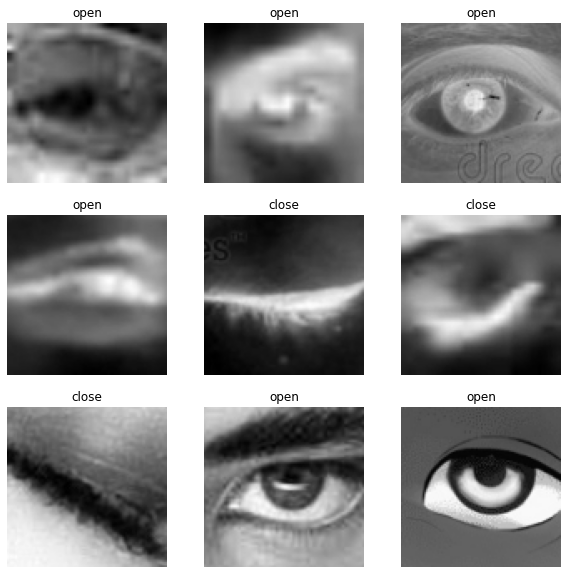

In [11]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
l = train_dataset.take(1)

print(class_names)

for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Print classes name

In [12]:
class_names = train_dataset.class_names
print(class_names)

['close', 'open']


As the original dataset doesn't contain a test set, you will create one. To do so, determine how many batches of data are available in the validation set using tf.data.experimental.cardinality, then move 20% of them to a test set.

*Poiché il set di dati originale non contiene un set di test, ne creerai uno. Per fare ciò, determina quanti batch di dati sono disponibili nel set di convalida utilizzando tf.data.experimental.cardinality , quindi sposta il 20% di essi in un set di test.*

In [13]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
test_dir = "/content/drive/MyDrive/ComputerVisionDeepLearning/retineurali/Images_for_MOBILENET/random"

!rm -rf /content/random/.ipynb_checkpoints

test_dataset = image_dataset_from_directory(test_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                            )
validation_dataset = validation_dataset.skip(val_batches // 5)

Found 20 files belonging to 2 classes.


In [14]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 2
Number of test batches: 1


### Configure the dataset for performance

Use buffered prefetching to load images from disk without having I/O become blocking. To learn more about this method see the data performance guide.

*Utilizzare il precaricamento con buffer per caricare le immagini dal disco senza che l'I/O si blocchi. Per ulteriori informazioni su questo metodo, vedere la guida alle prestazioni dei dati .*

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

###Using Data Augmentation


When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random, yet realistic, transformations to the training images, such as rotation and horizontal flipping. This helps expose the model to different aspects of the training data and reduce overfitting.


*Quando non si dispone di un set di dati di immagini di grandi dimensioni, è consigliabile introdurre artificialmente la diversità del campione applicando trasformazioni casuali, ma realistiche, alle immagini di addestramento, ad esempio rotazione e capovolgimento orizzontale. Ciò consente di esporre il modello a diversi aspetti dei dati di addestramento e di ridurre l' overfitting .*

In [16]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.05),

])

Let's repeatedly apply these layers to the same image and see the result.

*Applichiamo ripetutamente questi livelli alla stessa immagine e vediamo il risultato*

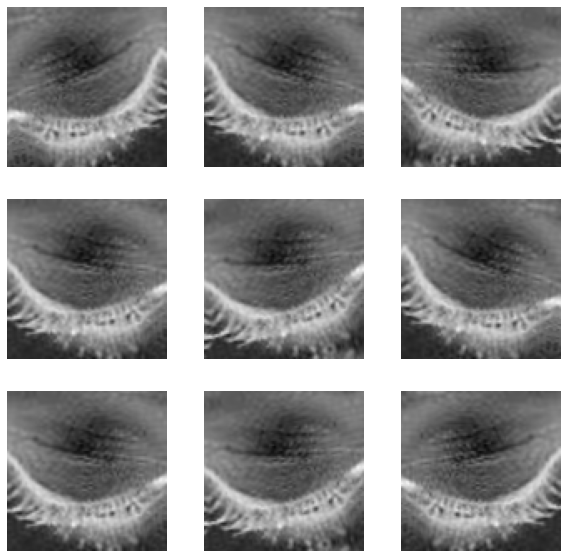

In [17]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

###Rescale pixel values
In a moment, you will download tf.keras.applications.MobileNetV2 for use as your base model. This model expects pixel values in [-1, 1], but at this point, the pixel values in your images are in [0, 255]. To rescale them, use the preprocessing method included with the model.

*In un attimo scaricherai tf.keras.applications.MobileNetV2 per usarlo come modello base. Questo modello prevede valori di pixel in [-1, 1] , ma a questo punto i valori di pixel nelle tue immagini sono in [0, 255] . Per ridimensionarli, utilizzare il metodo di preelaborazione incluso nel modello.*

In [18]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

###Create the base model from the pre-trained convnets

You will create the base model from the MobileNet V2 model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like jackfruit and syringe. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, you need to pick which layer of MobileNet V2 you will use for feature extraction. The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the include_top=False argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

 *Creerai il modello base dal modello MobileNet V2 sviluppato da Google. Questo è pre-addestrato sul set di dati ImageNet, un set di dati di grandi dimensioni composto da 1,4 milioni di immagini e 1000 classi. ImageNet è un set di dati di formazione alla ricerca con un'ampia varietà di categorie come jackfruit e syringe . Questa base di conoscenze ci aiuterà a classificare cani e gatti dal nostro set di dati specifico.

Innanzitutto, devi scegliere quale livello di MobileNet V2 utilizzerai per l'estrazione delle funzionalità. L'ultimo livello di classificazione (in "alto", poiché la maggior parte dei diagrammi dei modelli di apprendimento automatico va dal basso verso l'alto) non è molto utile. Invece, seguirai la pratica comune di dipendere dall'ultimo strato prima dell'operazione di appiattimento. Questo strato è chiamato "strato collo di bottiglia". Le caratteristiche dello strato collo di bottiglia mantengono una maggiore generalità rispetto allo strato finale/superiore.

Innanzitutto, crea un'istanza di un modello MobileNet V2 precaricato con pesi addestrati su ImageNet. Specificando l'argomento include_top=False , carichi una rete che non include i livelli di classificazione nella parte superiore, il che è l'ideale per l'estrazione di funzionalità*


In [19]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


This feature extractor converts each 160x160x3 image into a 5x5x1280 block of features. Let's see what it does to an example batch of images:

In [20]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 3, 3, 1280)


##Feature extraction
In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

###Freeze the convolutional base
It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's trainable flag to False will freeze all of them.

In [21]:
base_model.trainable = False

### Important note about BatchNormalization layers

Many models contain `tf.keras.layers.BatchNormalization` layers. This layer is a special case and precautions should be taken in the context of fine-tuning, as shown later in this tutorial. 

When you set `layer.trainable = False`, the `BatchNormalization` layer will run in inference mode, and will not update its mean and variance statistics. 

When you unfreeze a model that contains BatchNormalization layers in order to do fine-tuning, you should keep the BatchNormalization layers in inference mode by passing `training = False` when calling the base model. Otherwise, the updates applied to the non-trainable weights will destroy what the model has learned.


In [22]:
base_model.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                                                                                

##Add a classification head
To generate predictions from the block of features, average over the spatial `5x5` spatial locations, using a `tf.keras.layers.GlobalAveragePooling2D` layer to convert the features to  a single 1280-element vector per image.

In [23]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


Apply a `tf.keras.layers.Dense` layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a `logit`, or a raw prediction value.  Positive numbers predict class 1, negative numbers predict class 0.

In [24]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


Build a model by chaining together the data augmentation, rescaling, base_model and feature extractor layers using the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional). As previously mentioned, use training=False as our model contains a BatchNormalization layer.

In [25]:
inputs = tf.keras.Input(shape=(96, 96, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

###Compile the model
Compile the model before training it. Since there are two classes, use a binary cross-entropy loss with `from_logits=True` since the model provides a linear output.

In [26]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 96, 96, 3)         0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 96, 96, 3)        0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 96, 96, 3)        0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                             

**The** 2.5M parameters in MobileNet are frozen, but there are 1.2K _trainable_ parameters in the Dense layer.  These are divided between two `tf.Variable` objects, the weights and biases

In [28]:
len(model.trainable_variables)

2

##Train the model


After training for 10 epochs, you should see good accuracy on the validation set (94%).

In [29]:
initial_epochs = 20

loss0, accuracy0 = model.evaluate(validation_dataset)

2/2 [==============================] - 2s 240ms/step - loss: 0.6276 - accuracy: 0.6500


In [30]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.63
initial accuracy: 0.65


In [31]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/20
5/5 [==============================] - 3s 39ms/step - loss: 0.8377 - accuracy: 0.5625 - val_loss: 0.6044 - val_accuracy: 0.6750
Epoch 2/20
5/5 [==============================] - 0s 37ms/step - loss: 0.7398 - accuracy: 0.5500 - val_loss: 0.5852 - val_accuracy: 0.6750
Epoch 3/20
5/5 [==============================] - 0s 37ms/step - loss: 0.7453 - accuracy: 0.5750 - val_loss: 0.5657 - val_accuracy: 0.6750
Epoch 4/20
5/5 [==============================] - 0s 37ms/step - loss: 0.7497 - accuracy: 0.5938 - val_loss: 0.5470 - val_accuracy: 0.6750
Epoch 5/20
5/5 [==============================] - 0s 36ms/step - loss: 0.7928 - accuracy: 0.5562 - val_loss: 0.5300 - val_accuracy: 0.6750
Epoch 6/20
5/5 [==============================] - 0s 37ms/step - loss: 0.7438 - accuracy: 0.5688 - val_loss: 0.5136 - val_accuracy: 0.7250
Epoch 7/20
5/5 [==============================] - 0s 36ms/step - loss: 0.6863 - accuracy: 0.6062 - val_loss: 0.4982 - val_accuracy: 0.7250
Epoch 8/20
5/5 [===========

##Learning curves
Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet V2 base model as a fixed feature extractor.

Nota: se ti stai chiedendo perché le metriche di convalida sono chiaramente migliori delle metriche di addestramento, il fattore principale è perché livelli come tf.keras.layers.BatchNormalization e tf.keras.layers.Dropout influiscono sulla precisione durante l'addestramento. Sono disattivati ​​durante il calcolo della perdita di convalida.

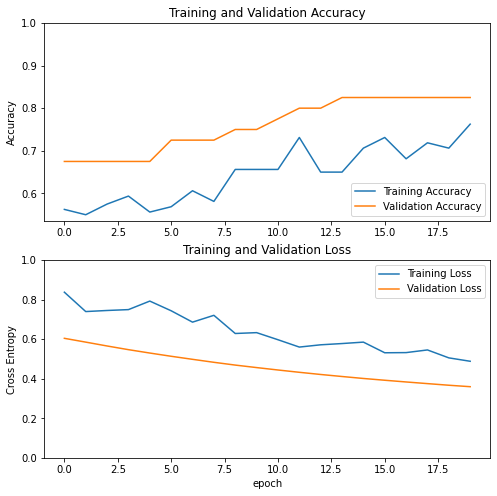

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine tuning
In the feature extraction experiment, you were only training a few layers on top of an MobileNet V2 base model. The weights of the pre-trained network were **not** updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

Note: This should only be attempted after you have trained the top-level classifier with the pre-trained model set to non-trainable. If you add a randomly initialized classifier on top of a pre-trained model and attempt to train all layers jointly, the magnitude of the gradient updates will be too large (due to the random weights from the classifier) and your pre-trained model will forget what it has learned.

Also, you should try to fine-tune a small number of top layers rather than the whole MobileNet model. In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning.

### Un-freeze the top layers of the model
All you need to do is unfreeze the `base_model` and set the bottom layers to be un-trainable. Then, you should recompile the model (necessary for these changes to take effect), and resume training.

In [33]:
base_model.trainable = True

In [34]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


### Compile the model

As you are training a much larger model and want to readapt the pretrained weights, it is important to use a lower learning rate at this stage. Otherwise, your model could overfit very quickly.

In [35]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [36]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 96, 96, 3)         0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 96, 96, 3)        0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 96, 96, 3)        0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                             

In [37]:
len(model.trainable_variables)

56

### Continue training the model
If you trained to convergence earlier, this step will improve your accuracy by a few percentage points.

In [38]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 20/30
5/5 [==============================] - 7s 215ms/step - loss: 0.3791 - accuracy: 0.8438 - val_loss: 0.2236 - val_accuracy: 0.9000
Epoch 21/30
5/5 [==============================] - 0s 37ms/step - loss: 0.2666 - accuracy: 0.8875 - val_loss: 0.1656 - val_accuracy: 0.9000
Epoch 22/30
5/5 [==============================] - 0s 38ms/step - loss: 0.1981 - accuracy: 0.9250 - val_loss: 0.1495 - val_accuracy: 0.9000
Epoch 23/30
5/5 [==============================] - 0s 42ms/step - loss: 0.1461 - accuracy: 0.9563 - val_loss: 0.1402 - val_accuracy: 0.9250
Epoch 24/30
5/5 [==============================] - 0s 41ms/step - loss: 0.1256 - accuracy: 0.9688 - val_loss: 0.1229 - val_accuracy: 0.9500
Epoch 25/30
5/5 [==============================] - 0s 42ms/step - loss: 0.1561 - accuracy: 0.9438 - val_loss: 0.1175 - val_accuracy: 0.9500
Epoch 26/30
5/5 [==============================] - 0s 42ms/step - loss: 0.1146 - accuracy: 0.9625 - val_loss: 0.1249 - val_accuracy: 0.9500
Epoch 27/30
5/5 [==

Let's take a look at the learning curves of the training and validation accuracy/loss when fine-tuning the last few layers of the MobileNet V2 base model and training the classifier on top of it. If the validation loss is much higher than the training loss, so you may get some overfitting.

You may also get some overfitting as the new training set is relatively small and similar to the original MobileNet V2 datasets.
After fine tuning the model nearly reaches 98% accuracy on the validation set.




Diamo un'occhiata alle curve di apprendimento dell'accuratezza/perdita di formazione e convalida durante la messa a punto degli ultimi livelli del modello base MobileNetV2 e il training del classificatore su di esso. La perdita di convalida è molto più alta della perdita di allenamento, quindi potresti avere un po' di overfitting.

È inoltre possibile che il nuovo set di addestramento sia relativamente piccolo e simile ai set di dati MobileNetV2 originali.

Dopo la messa a punto, il modello raggiunge quasi il 98% di precisione sul set di convalida.

In [39]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

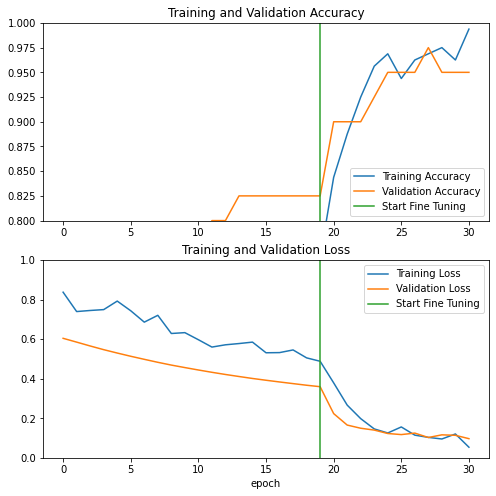

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluation and prediction
Finaly you can verify the performance of the model on new data using test set.

In [41]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

1/1 [==============================] - 3s 3s/step - loss: 0.5550 - accuracy: 0.8000
Test accuracy : 0.800000011920929


And now you are all set to use this model to predict if your eye is opened or closed.

tf.Tensor(
[0.74797255 0.61742723 0.94126433 0.97142494 0.21886575 0.66571283
 0.9962115  0.8859141  0.9977271  0.22164811 0.99692    0.99715155
 0.37120736 0.9500328  0.9979728  0.996977   0.06943282 0.3481302
 0.9976246  0.94907296], shape=(20,), dtype=float32)
Predictions:
 [1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1]
Labels:
 [0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0]


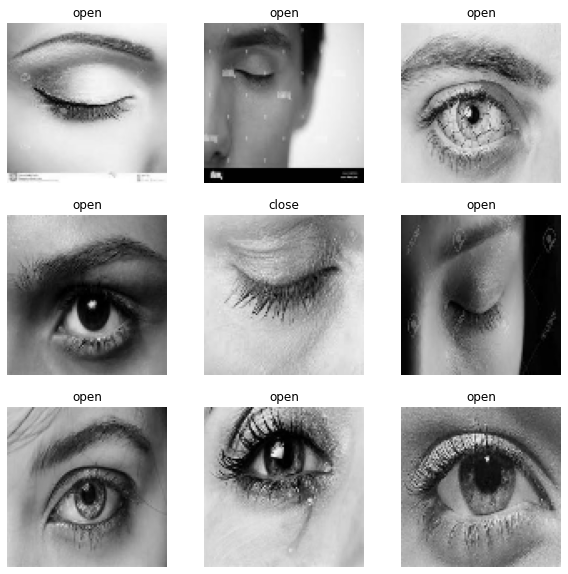

In [42]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
print(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [43]:
confusion_m = tf.math.confusion_matrix(labels = label_batch , predictions = predictions)
print(confusion_m)
accuracy = np.trace(confusion_m) / float(np.sum(confusion_m))
misclass = 1 - accuracy
print("OA: ",accuracy)

tf.Tensor(
[[ 5  5]
 [ 0 10]], shape=(2, 2), dtype=int32)
OA:  0.75


##Lite Version

In [ ]:
model.save('/content/drive/MyDrive/eye_trained_model_20ep.h5', save_format='h5')

!zip -rv /content/drive/MyDrive/eye_trained_model_20ep.h5.zip /content/drive/MyDrive

#!unzip eye_trained_model.h5.zip /content/drive/MyDrive/colab_img/MODEL/

In [ ]:
import tensorflow as tf

from tensorflow import keras

#!unzip -o /content/drive/MyDrive/eye_trained_model_20ep.h5.zip -d ./drive/MyDrive

model = keras.models.load_model('/content/drive/MyDrive/eye_trained_model_20ep.h5')

model.summary()

##Convert standard model to Lite

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open('/content/drive/MyDrive/eye_trained_model_20ep.h5', 'wb') as file:
    file.write(tflite_model)

In [ ]:
import tensorflow as tf

with open("/content/drive/MyDrive/eye_trained_model_20ep.h5", 'rb') as file:
    tflite_model = file.read()

interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
'''import cv2
from google.colab.patches import cv2_imshow
import glob
!ls
list_of_dirs = glob.glob('/content/MRL')

for item in list_of_dirs:
  #print(item)
  img = cv2.imread(item,cv2.IMREAD_GRAYSCALE) #you can skif if you have in memory a grayscale image...
  #resized = cv2.resize(img, (96,96), interpolation=cv2.INTER_CUBIC )
  resize = cv2.resize(img, (0, 0), fx=0.75, fy=0.75) 
  
  img_r = np.zeros((1,resize.shape[0], resize.shape[1], 3))  
  for i in range(3):  
    img_r[0,:,:,i] = img
    
  predictions = model.predict(img_r)
  #print(predictions)

  # Apply a sigmoid since our model returns logits
  predictions = tf.nn.sigmoid(predictions)
  print(predictions)
  predictions = tf.where(predictions < 0.5, 0, 1)
  cv2_imshow(resize)
  print('Predictions:\n', predictions.numpy())
  #print('Labels:\n', label_batch)'''

In [ ]:
'''def Lite_Prediction(img):
    input_data = np.array(img, dtype=np.float32)
    input_data = np.expand_dims(input_data, axis=0)
    print("input shape",input_data.shape)

    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    return interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
####
folder = '/content/MRL/close'
index = 0
for file_name in os.listdir(folder):

  if index == 1:
    break
  image_test = cv2.imread(folder + '/' + file_name)
  image_alpha = cv2.resize(image_test, (0, 0), fx=0.75, fy=0.75)
  p = np.empty(shape = [0])
  p = np.append(p, Lite_Prediction(image_alpha))
  p = tf.nn.sigmoid(p)
  p = tf.where(p < 0.5,0,1)
  
  plt.figure(figsize=(10, 10))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    #plt.title(class_names[p[i]])
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis("off")
  
  index += 1
  
  print('p:\n', p.numpy())'''

  
  

  






2 Versione Lite